# Dutch weather dataset - daily data

- https://www.knmi.nl/nederland-nu/klimatologie/daggegevens

## Installing packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mode
import collections
from datetime import date

## Importing data

In [2]:
weather = pd.read_csv(r'C:\Users\claud\data_final_project\Usefull\etmgeg_240_Ams_Schiphol\etmgeg_240.txt', low_memory = False)
weather = weather[(weather.YYYYMMDD >= 20131231)]
weather.head()

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
23010,240,20131231,167,72,73,90,10,50,5,130,...,24,83,18,8,83,95,24,63,18,2
23011,240,20140101,168,78,80,110,21,60,2,170,...,1,75,15,7,89,95,2,78,15,2
23012,240,20140102,191,62,70,100,1,50,16,140,...,10,70,2,5,88,93,10,81,13,3
23013,240,20140103,199,91,97,130,23,70,1,230,...,6,75,24,6,86,95,7,78,20,2
23014,240,20140104,169,64,69,110,1,40,23,150,...,6,74,14,7,86,93,22,79,14,2


In [3]:
weather.shape

(2879, 41)

- Excluding the first column as it contains only the data station reference

In [4]:
weather.columns

Index(['# STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24'],
      dtype='object')

In [5]:
weather = weather[['YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24']]

## Data Cleaning

- Standardizing headers by removing spaces and capital letters

In [6]:
def standardheader(df):
    df.columns = [x.strip(' ').lower() for x in df.columns]

In [7]:
standardheader(weather)

In [8]:
weather.columns

Index(['yyyymmdd', 'ddvec', 'fhvec', 'fg', 'fhx', 'fhxh', 'fhn', 'fhnh', 'fxx',
       'fxxh', 'tg', 'tn', 'tnh', 'tx', 'txh', 't10n', 't10nh', 'sq', 'sp',
       'q', 'dr', 'rh', 'rhx', 'rhxh', 'pg', 'px', 'pxh', 'pn', 'pnh', 'vvn',
       'vvnh', 'vvx', 'vvxh', 'ng', 'ug', 'ux', 'uxh', 'un', 'unh', 'ev24'],
      dtype='object')

- Checking NaN values

In [9]:
weather.isna().sum()
#weather.isnull().sum() # both give the same result

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        0
t10nh       0
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         0
vvnh        0
vvx         0
vvxh        0
ng          0
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 23010 to 25888
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yyyymmdd  2879 non-null   int64 
 1   ddvec     2879 non-null   int64 
 2   fhvec     2879 non-null   int64 
 3   fg        2879 non-null   int64 
 4   fhx       2879 non-null   int64 
 5   fhxh      2879 non-null   int64 
 6   fhn       2879 non-null   int64 
 7   fhnh      2879 non-null   int64 
 8   fxx       2879 non-null   object
 9   fxxh      2879 non-null   object
 10  tg        2879 non-null   int64 
 11  tn        2879 non-null   int64 
 12  tnh       2879 non-null   object
 13  tx        2879 non-null   int64 
 14  txh       2879 non-null   object
 15  t10n      2879 non-null   object
 16  t10nh     2879 non-null   object
 17  sq        2879 non-null   object
 18  sp        2879 non-null   object
 19  q         2879 non-null   object
 20  dr        2879 non-null   object
 21  rh       

- Checking how a column type 'object' looks like

In [11]:
weather['fxx'].unique()

array(['  130', '  170', '  140', '  230', '  150', '  180', '  240',
       '  120', '   90', '   80', '  100', '  110', '   60', '  200',
       '  160', '  220', '  210', '   70', '   50', '  250', '  190',
       '  270', '   40', '  320', '  280', '  260', '   30', '  340',
       '  310', '  300'], dtype=object)

In [12]:
weather['fxx'][:10]

23010      130
23011      170
23012      140
23013      230
23014      150
23015      140
23016      180
23017      180
23018      130
23019      240
Name: fxx, dtype: object

In [13]:
weather['t10n'].unique()

array(['   44', '   34', '   50', '   51', '   48', '    6', '   61',
       '   79', '   55', '   63', '   35', '    8', '  -32', '   25',
       '   19', '   14', '   36', '   39', '    1', '    5', '    2',
       '   20', '   31', '   12', '  -27', '  -30', '  -52', '   33',
       '   15', '   -1', '   18', '   32', '   52', '   29', '   -2',
       '   53', '  -11', '  -15', '   37', '   38', '   16', '   42',
       '   17', '   -7', '  -19', '  -16', '  -34', '    9', '  -10',
       '  -26', '  -25', '   76', '   78', '   64', '   58', '    7',
       '   28', '   82', '   26', '   72', '  103', '   60', '   71',
       '   97', '   45', '   41', '   74', '   30', '   -4', '  -29',
       '   96', '   80', '   47', '   40', '  114', '  108', '  100',
       '   95', '   99', '  107', '   90', '   23', '    3', '   75',
       '  142', '  120', '   94', '   86', '  118', '  145', '   43',
       '   22', '   68', '  123', '  153', '   69', '  116', '  127',
       '   87', '   

In [14]:
weather['t10n'][:10]

23010       44
23011       34
23012       50
23013       51
23014       48
23015        6
23016       61
23017       79
23018       55
23019       63
Name: t10n, dtype: object

- We have a problem with spaces (' ')

In [15]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = [x.strip(' ') for x in weather[x]]
    else:
        pass

In [16]:
weather['t10n'].unique()

array(['44', '34', '50', '51', '48', '6', '61', '79', '55', '63', '35',
       '8', '-32', '25', '19', '14', '36', '39', '1', '5', '2', '20',
       '31', '12', '-27', '-30', '-52', '33', '15', '-1', '18', '32',
       '52', '29', '-2', '53', '-11', '-15', '37', '38', '16', '42', '17',
       '-7', '-19', '-16', '-34', '9', '-10', '-26', '-25', '76', '78',
       '64', '58', '7', '28', '82', '26', '72', '103', '60', '71', '97',
       '45', '41', '74', '30', '-4', '-29', '96', '80', '47', '40', '114',
       '108', '100', '95', '99', '107', '90', '23', '3', '75', '142',
       '120', '94', '86', '118', '145', '43', '22', '68', '123', '153',
       '69', '116', '127', '87', '83', '117', '59', '62', '73', '56',
       '91', '128', '147', '131', '146', '130', '124', '119', '113',
       '121', '170', '168', '175', '191', '140', '159', '155', '148',
       '105', '126', '138', '101', '149', '135', '111', '98', '122', '92',
       '88', '57', '67', '84', '46', '115', '132', '102', '66', '77

- As now all the information in the data frame looks like numeric let's convert all columns to numeric

In [17]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = pd.to_numeric(weather[x], errors='coerce')
    else:
        pass


In [18]:
weather.dtypes

yyyymmdd      int64
ddvec         int64
fhvec         int64
fg            int64
fhx           int64
fhxh          int64
fhn           int64
fhnh          int64
fxx           int64
fxxh          int64
tg            int64
tn            int64
tnh           int64
tx            int64
txh           int64
t10n        float64
t10nh       float64
sq            int64
sp            int64
q             int64
dr            int64
rh            int64
rhx           int64
rhxh          int64
pg            int64
px            int64
pxh           int64
pn            int64
pnh           int64
vvn         float64
vvnh        float64
vvx         float64
vvxh        float64
ng          float64
ug            int64
ux            int64
uxh           int64
un            int64
unh           int64
ev24          int64
dtype: object

- Checking + Treating NaN values after transformation in numeric

In [19]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        8
t10nh       8
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         1
vvnh        1
vvx         1
vvxh        1
ng          5
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

In [20]:
nans = ['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']

In [21]:
for x in nans:
    print(weather[x].describe().T, '\n')

count    2871.000000
mean       54.573668
std        55.138357
min      -125.000000
25%        15.000000
50%        54.000000
75%        96.000000
max       191.000000
Name: t10n, dtype: float64 

count    2871.000000
mean       13.481714
std         8.511783
min         6.000000
25%         6.000000
50%         6.000000
75%        24.000000
max        24.000000
Name: t10nh, dtype: float64 

count    2878.000000
mean       47.077137
std        20.379173
min         0.000000
25%        33.000000
50%        56.000000
75%        62.000000
max        80.000000
Name: vvn, dtype: float64 

count    2878.000000
mean        9.675122
std         8.286393
min         1.000000
25%         3.000000
50%         6.000000
75%        18.000000
max        24.000000
Name: vvnh, dtype: float64 

count    2878.000000
mean       76.228631
std         7.171022
min         9.000000
25%        74.000000
50%        80.000000
75%        82.000000
max        83.000000
Name: vvx, dtype: float64 

count    2878.00

In [22]:
for x in nans:
    a = weather[x].mode()
    weather[x] = weather[x].fillna(a)

In [23]:
a = [x for x in weather.isna().sum().tolist() if x != 0]
a

[8, 8, 1, 1, 1, 1, 5]

- As the code didn't work, doing it separated

In [24]:
weather['t10n'] = weather['t10n'].fillna(weather['t10n'].mode())
weather['t10nh'] = weather['t10nh'].fillna(weather['t10nh'].mode())
weather['vvn'] = weather['vvn'].fillna(weather['vvn'].mode())
weather['vvnh'] = weather['vvnh'].fillna(weather['vvnh'].mode())
weather['vvx'] = weather['vvx'].fillna(weather['vvx'].mode())
weather['vvxh'] = weather['vvxh'].fillna(weather['vvxh'].mode())
weather['ng'] = weather['ng'].fillna(weather['ng'].mode())

In [25]:
weather['t10n'][weather['t10n'].isna()==True]

25605   NaN
25606   NaN
25607   NaN
25608   NaN
25610   NaN
25611   NaN
25612   NaN
25613   NaN
Name: t10n, dtype: float64

 - As still not working -> Replacing Nan in all data frame, but checking the attention columns

In [26]:
nan = weather[['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']]
nan.describe().T

,count,mean,std,min,25%,50%,75%,max
t10n,2871.0,54.573668,55.138357,-125.0,15.0,54.0,96.0,191.0
t10nh,2871.0,13.481714,8.511783,6.0,6.0,6.0,24.0,24.0
vvn,2878.0,47.077137,20.379173,0.0,33.0,56.0,62.0,80.0
vvnh,2878.0,9.675122,8.286393,1.0,3.0,6.0,18.0,24.0
vvx,2878.0,76.228631,7.171022,9.0,74.0,80.0,82.0,83.0
vvxh,2878.0,12.501390,5.482855,1.0,10.0,13.0,16.0,24.0
ng,2874.0,5.799235,2.211192,0.0,5.0,6.0,8.0,8.0


In [27]:
weather = weather.replace(np.nan, 0)

In [28]:
nan = weather[['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']]
nan.describe().T

,count,mean,std,min,25%,50%,75%,max
t10n,2879.0,54.422022,55.136586,-125.0,14.0,54.0,96.0,191.0
t10nh,2879.0,13.444251,8.529530,0.0,6.0,6.0,24.0,24.0
vvn,2879.0,47.060785,20.394514,0.0,33.0,56.0,62.0,80.0
vvnh,2879.0,9.671761,8.286916,0.0,3.0,6.0,18.0,24.0
vvx,2879.0,76.202154,7.309174,0.0,74.0,80.0,82.0,83.0
vvxh,2879.0,12.497048,5.486851,0.0,10.0,13.0,16.0,24.0
ng,2879.0,5.789163,2.222431,0.0,5.0,6.0,8.0,8.0


In [29]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        0
t10nh       0
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         0
vvnh        0
vvx         0
vvxh        0
ng          0
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

- Checking if we have all days in a sequence

In [30]:
weather.head() #getting start date

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,...,vvnh,vvx,vvxh,ng,ug,ux,uxh,un,unh,ev24
23010,20131231,167,72,73,90,10,50,5,130,11,...,24.0,83.0,18.0,8.0,83,95,24,63,18,2
23011,20140101,168,78,80,110,21,60,2,170,21,...,1.0,75.0,15.0,7.0,89,95,2,78,15,2
23012,20140102,191,62,70,100,1,50,16,140,1,...,10.0,70.0,2.0,5.0,88,93,10,81,13,3
23013,20140103,199,91,97,130,23,70,1,230,19,...,6.0,75.0,24.0,6.0,86,95,7,78,20,2
23014,20140104,169,64,69,110,1,40,23,150,1,...,6.0,74.0,14.0,7.0,86,93,22,79,14,2


In [31]:
weather.tail() #getting end date

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,...,vvnh,vvx,vvxh,ng,ug,ux,uxh,un,unh,ev24
25884,20211113,265,9,25,70,1,10,20,110,1,...,2.0,70.0,11.0,8.0,93,97,2,82,13,5
25885,20211114,64,32,33,50,10,10,1,80,9,...,2.0,67.0,22.0,8.0,91,98,2,81,22,3
25886,20211115,63,31,33,40,10,20,23,80,12,...,19.0,70.0,6.0,8.0,89,94,15,85,1,1
25887,20211116,173,20,24,50,23,10,3,80,24,...,17.0,56.0,2.0,8.0,90,97,18,85,2,1
25888,20211117,246,36,46,70,14,30,18,100,12,...,7.0,75.0,11.0,6.0,86,97,7,70,14,4


In [32]:
# Calculating the days within the dataset interval based on the head() and tail()
d0 = date(2013, 12, 31)
d1 = date(2021, 11, 17)
delta = (d1 - d0).days

# Calculating the amount of lines in the dataset
delta2 = len(weather['yyyymmdd'])-1

# Doing the check
if (int(delta) - delta2) == 0:
    print('Ok number of rows!')
else:
    print('You have a difference of rows, please check missing information.', int(delta) - delta2, 'missing values')

Ok number of rows!


- Creating a column that tells if rained or not and another one to give this info for the previous day

In [33]:
rain = []
r = 0

for i in weather['rh']:
    if i != 0:
        r = 1
    else:
        r = 0
    rain.append(r)
    
weather['rain'] = rain # column that tells if rained on that day
weather['rainy'] = weather['rain'].shift(1) # column that tells if rained on the day before
weather['rainy'] = weather['rainy'].fillna(mode(weather['rain'])) # the 1st row is going to be NaN, this line replaces for the mode
weather['rainy'] = weather['rainy'].astype('int') # converts from float to int

In [34]:
weather['rainy'].isna().sum()

0

In [35]:
weatherstat = weather.describe().T
weatherstat

,count,mean,std,min,25%,50%,75%,max
yyyymmdd,2879.0,2.017511e+07,22675.165501,20131231.0,20151220.5,20171209.0,20191128.5,20211117.0
ddvec,2879.0,1.937444e+02,91.040094,1.0,127.0,211.0,258.0,360.0
fhvec,2879.0,4.283258e+01,22.896444,2.0,26.0,39.0,56.0,142.0
fg,2879.0,4.874644e+01,21.806169,10.0,33.0,45.0,61.0,146.0
fhx,2879.0,7.367836e+01,28.039646,20.0,50.0,70.0,90.0,230.0
fhxh,2879.0,1.170129e+01,5.787561,1.0,9.0,12.0,15.0,24.0
fhn,2879.0,2.402918e+01,17.903121,0.0,10.0,20.0,30.0,130.0
fhnh,2879.0,9.033692e+00,8.690768,1.0,1.0,4.0,19.0,24.0
fxx,2879.0,1.178882e+02,42.727379,30.0,90.0,110.0,140.0,340.0
fxxh,2879.0,1.232685e+01,5.710147,1.0,10.0,13.0,16.0,24.0


- Let's analyze the negative values

In [36]:
weatherstat[weatherstat['min'] < 0]

,count,mean,std,min,25%,50%,75%,max
tg,2879.0,113.363321,58.678859,-66.0,67.0,112.0,161.0,295.0
tn,2879.0,73.533866,54.981595,-105.0,32.0,74.0,118.0,214.0
tx,2879.0,151.348732,67.235193,-45.0,98.0,149.0,204.5,364.0
t10n,2879.0,54.422022,55.136586,-125.0,14.0,54.0,96.0,191.0
rh,2879.0,22.631817,47.212860,-1.0,0.0,1.0,25.0,672.0
rhx,2879.0,8.847169,18.549717,-1.0,0.0,1.0,11.0,265.0


In [37]:
weather[weather['tg'] < 0].shape

(58, 42)

- Let's check what is the historical minimum for the country and set it as the inferior limit

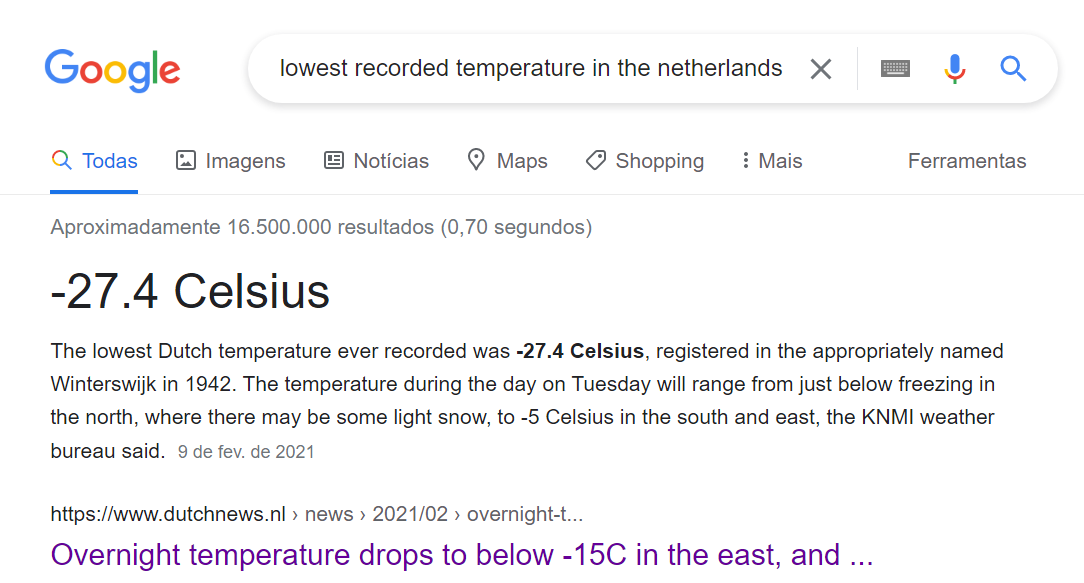

In [38]:
negtemp = weather[weather['tg'] < 0]['tg'].tolist()
negtemp.sort()

In [39]:
occurrences = collections.Counter(negtemp)
negtemps = pd.DataFrame(occurrences, index = ['temp', 'count'])
negtemps.T

,temp,count
-66,1,1
-50,1,1
-49,2,2
-46,1,1
-45,1,1
-38,1,1
-35,2,2
-34,1,1
-33,1,1
-29,3,3


- Looking to the date above we can check that we have some extreme values but other are acceptable, so let's change the filter

In [40]:
negtemp = weather[weather['tg'] < -28]['tg'].tolist()
negtemp.sort()

In [41]:
occurrences = collections.Counter(negtemp)
negtemp = pd.DataFrame(occurrences, index = ['temp', 'count'])
negtemps = negtemp.T
negtemps

,temp,count
-66,1,1
-50,1,1
-49,2,2
-46,1,1
-45,1,1
-38,1,1
-35,2,2
-34,1,1
-33,1,1
-29,3,3


In [42]:
negtemps['count'].sum()

14

In [43]:
weather[weather['tg'] < -28].T

,23398,23758,24123,24124,24529,24530,24531,24532,25605,25606,25608,25609,25610,25611
yyyymmdd,20150123.0,20160118.0,20170117.0,20170118.0,20180227.0,20180228.0,20180301.0,20180302.0,20210207.0,20210208.0,20210210.0,20210211.0,20210212.0,20210213.0
ddvec,175.0,139.0,128.0,127.0,66.0,79.0,78.0,77.0,63.0,70.0,52.0,89.0,78.0,106.0
fhvec,27.0,31.0,17.0,12.0,42.0,79.0,112.0,94.0,120.0,81.0,37.0,14.0,60.0,52.0
fg,33.0,31.0,18.0,14.0,44.0,80.0,112.0,95.0,121.0,81.0,40.0,19.0,60.0,53.0
fhx,80.0,50.0,30.0,20.0,60.0,100.0,120.0,120.0,140.0,110.0,60.0,40.0,80.0,70.0
fhxh,24.0,9.0,6.0,1.0,4.0,16.0,5.0,4.0,6.0,4.0,1.0,20.0,13.0,23.0
fhn,10.0,20.0,0.0,0.0,30.0,50.0,100.0,60.0,100.0,40.0,10.0,0.0,30.0,40.0
fhnh,1.0,5.0,16.0,21.0,7.0,1.0,1.0,23.0,23.0,21.0,24.0,7.0,1.0,5.0
fxx,130.0,70.0,50.0,40.0,90.0,160.0,190.0,180.0,220.0,170.0,100.0,60.0,130.0,100.0
fxxh,24.0,9.0,6.0,7.0,1.0,18.0,9.0,1.0,9.0,2.0,1.0,14.0,12.0,2.0


- The columns with temperatures < -28°C also present the other weird values. As the amount of row in this situation in very small, let's first merge the datasets before excluding information

- Renaming date column + setting date as he index

In [44]:
weather = weather.rename(columns={'yyyymmdd': 'date'})

In [45]:
weather = weather.set_index('date')

- Creating another data frame with most important info

In [46]:
weather2 = weather.copy()
weather2 = weather2[['ddvec', 'fhvec', 'fg', 'tg', 'q', 'dr', 'rh', 'pg', 'ng', 'ug', 'ev24', 'rain', 'rainy']]

In [47]:
weather2.head()

,ddvec,fhvec,fg,tg,q,dr,rh,pg,ng,ug,ev24,rain,rainy
date,,,,,,,,,,,,,
20131231,167,72,73,66,179,53,40,10103,8.0,83,2,1,1
20140101,168,78,80,68,182,45,28,10020,7.0,89,2,1,1
20140102,191,62,70,83,193,20,16,9971,5.0,88,3,1,1
20140103,199,91,97,85,167,33,33,9993,6.0,86,2,1,1
20140104,169,64,69,76,182,5,4,9985,7.0,86,2,1,1


DDVEC = Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=cale/variable)*

FHVEC = Vector mean wind speed (in 0.1 m/s)*

FG = 24-hour mean wind speed (in 0.1 m/s)

TG = 24-hour average temperature (in 0.1 degrees Celsius)

Q = Global radiation (in J/cm2) / Global radiation (in J/cm2)

DR = Duration of precipitation (in 0.1 hour) / Precipitation duration (in 0.1 hour)

RH = Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

PG = 24-hour mean air pressure converted to sea level (in 0.1 hPa) calculated from 24 hourly values / Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values

NG = 24-hour average cloud cover (coverage of the upper air in eighths, 9=superior invisible) / Mean daily cloud cover (in octants, 9=sky invisible)

UG = 24-hour average relative humidity (in percents) / Daily mean relative atmospheric humidity (in percents)

EV24 = Reference crop evaporation (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)

*See http://www.knmi.nl/kennis-en-datacentrum/grond/klimatologische-brochures-en-boeken

- Exporting this treated data

In [48]:
weather.to_csv('dutchweather.csv')
weather2.to_csv('dutchweather2.csv')

- Checking for correlations

In [50]:
correlations_matrix = weather2.corr()
correlations_matrix

,ddvec,fhvec,fg,tg,q,dr,rh,pg,ng,ug,ev24,rain,rainy
ddvec,1.000000,0.107347,0.154639,0.034090,-0.071949,0.129662,0.108147,-0.063849,0.223882,0.147160,-0.069526,0.290877,0.248048
fhvec,0.107347,1.000000,0.966034,-0.151493,-0.267376,0.279877,0.189099,-0.313703,0.214951,-0.024241,-0.270991,0.295134,0.223296
fg,0.154639,0.966034,1.000000,-0.129420,-0.276764,0.359538,0.271145,-0.395916,0.250582,-0.010277,-0.273782,0.363606,0.260984
tg,0.034090,-0.151493,-0.129420,1.000000,0.628450,-0.143304,0.022297,0.001009,-0.137322,-0.385031,0.715516,-0.123625,-0.156470
q,-0.071949,-0.267376,-0.276764,0.628450,1.000000,-0.398382,-0.217683,0.223562,-0.548870,-0.745986,0.987163,-0.414601,-0.290591
dr,0.129662,0.279877,0.359538,-0.143304,-0.398382,1.000000,0.735884,-0.457651,0.376472,0.396820,-0.374712,0.472415,0.288360
rh,0.108147,0.189099,0.271145,0.022297,-0.217683,0.735884,1.000000,-0.367269,0.257220,0.258636,-0.195568,0.372578,0.223671
pg,-0.063849,-0.313703,-0.395916,0.001009,0.223562,-0.457651,-0.367269,1.000000,-0.312199,-0.186088,0.191668,-0.431546,-0.298171
ng,0.223882,0.214951,0.250582,-0.137322,-0.548870,0.376472,0.257220,-0.312199,1.000000,0.487471,-0.512386,0.486022,0.296640
ug,0.147160,-0.024241,-0.010277,-0.385031,-0.745986,0.396820,0.258636,-0.186088,0.487471,1.000000,-0.719995,0.380090,0.293229


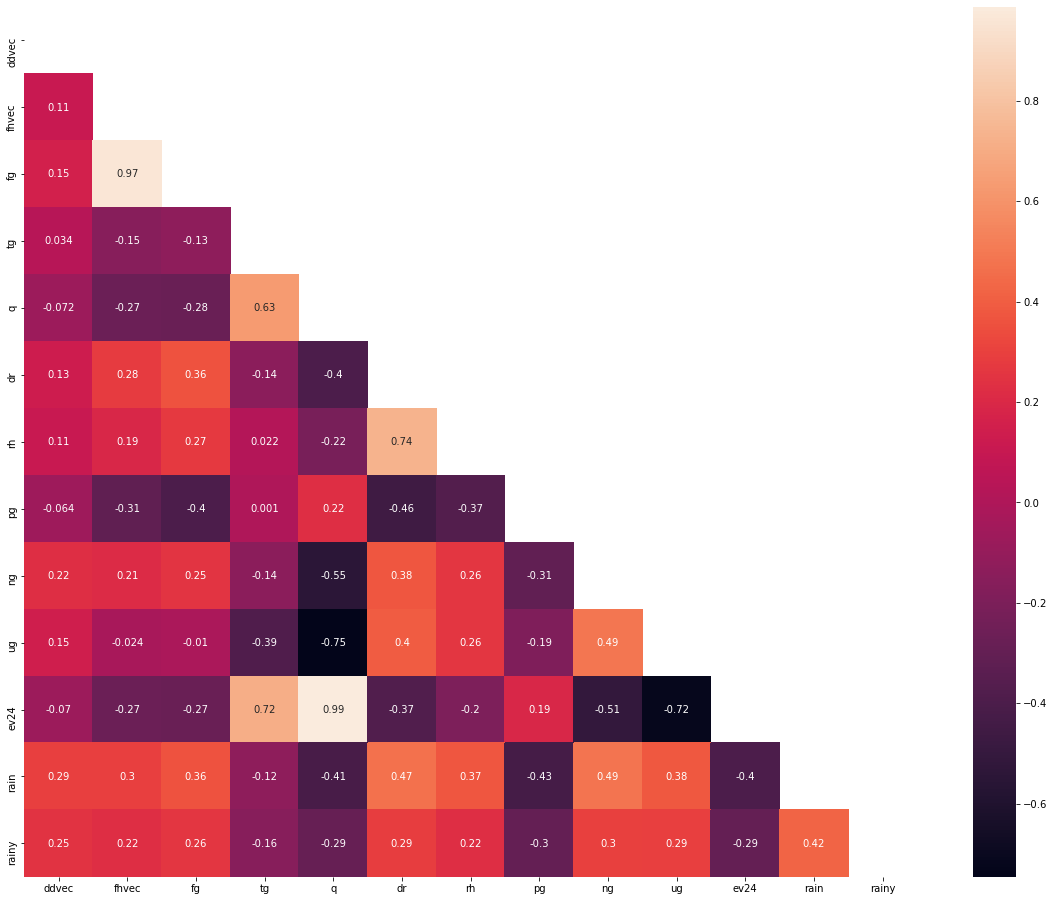

In [51]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)#change annot to False to hide the text, as it's unreadable
plt.show()